In [1]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np

import seaborn as sns
import seaborn.objects as so
# Apply the default theme
sns.set_theme()
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../scripts")
import helpers as h
import window_detect2 as w
import scores as s
import paper_data as p

In [23]:
a00, a01 = h.import_desired_data("A", "15T")
b00, b01 = h.import_desired_data("B", "15T")
c00, c01 = h.import_desired_data("C", "15T")
pa = p.Paper_Data(a01)
pb = p.Paper_Data(b00)
pc = p.Paper_Data(c00)

In [24]:
table_data = {
    "A": pa.calc_table_data(),
    "B": pb.calc_table_data(),
    "C": pc.calc_table_data()
}

tdf = pd.DataFrame(table_data)
tdf

# maybe number of openings?

A
A


,A,B,C
Starting Day,2022-07-20 07:15:00,2022-07-27 09:00:00,2022-09-08 08:00:00
Data Length,4 days 00:00:00,14 days 10:45:00,3 days 00:00:00
Room,1.0,0.0,0.0
Opening Percentage,0.412987,0.051873,0.221453
Median Open Time,0 days 06:52:30,3 days 01:22:30,0 days 15:00:00


/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.dist_fig.show()


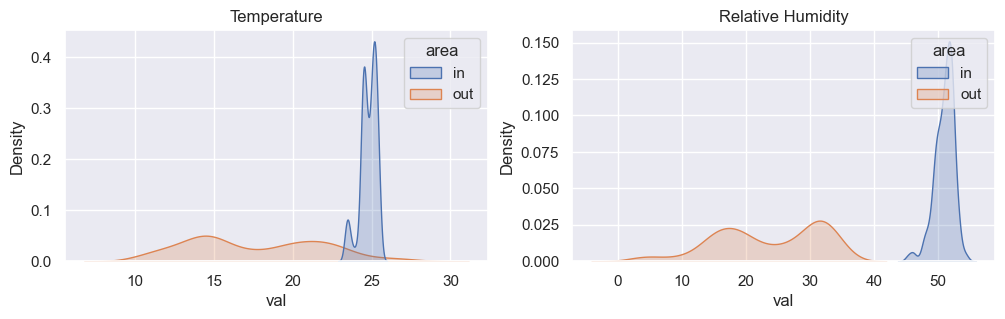

In [4]:
f = pa.plot_distributions()

/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.dist_fig.show()


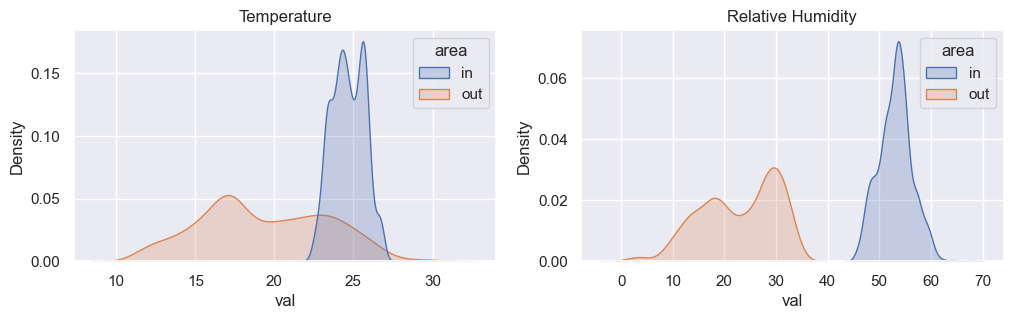

In [5]:
f = pb.plot_distributions()

/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.dist_fig.show()


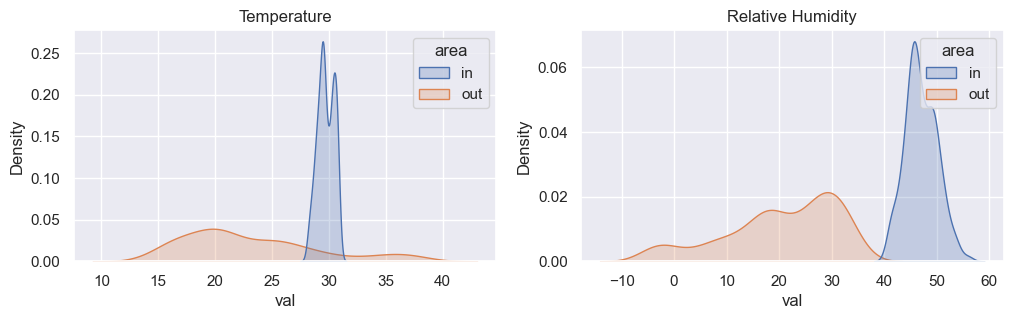

In [6]:
f = pc.plot_distributions()

In [7]:
# todo =>plot so share an x axis across experiments  

# Scratch

In [8]:
# measured data 
a00, a01 = h.import_desired_data("A", "15T")
temp0 =h.normalize(a01["Temp C"]) 
window_sched = a01["Window Open"]
datetime = a01["DateTime"]

### temperature and rh distributions 

In [9]:
in_val = {
    "val": a01["Temp C"],
    "area": pd.Series(["in"]*len(a01))
}
out_val  = {
    "val": a01["Ambient Temp"],
    "area": ["out"]*len(a01)
}

temps = pd.concat([pd.DataFrame(in_val), pd.DataFrame(out_val)])

In [10]:
in_val = {
    "val": a01["RH %"],
    "area": pd.Series(["in"]*len(a01))
}
out_val  = {
    "val": a01["Ambient RH"],
    "area": ["out"]*len(a01)
}

rhs = pd.concat([pd.DataFrame(in_val), pd.DataFrame(out_val)])

Text(0.5, 1.0, 'Relative Humidity')

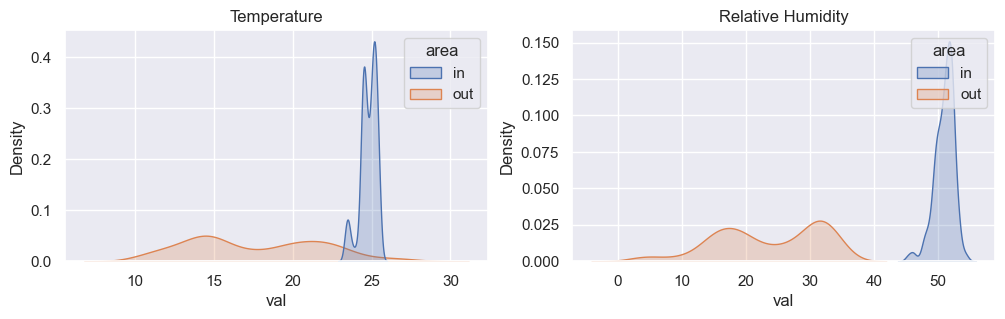

In [11]:
fig, axs = plt.subplots(1, 2,figsize=(12, 3))
sns.kdeplot(data=temps,  x="val", hue="area",  fill=True, ax=axs[0])
axs[0].set_title("Temperature")
sns.kdeplot(data=rhs,  x="val", hue="area",  fill=True, ax=axs[1])
axs[1].set_title("Relative Humidity")

### general

In [12]:
starting_day = datetime[0]
starting_day

Timestamp('2022-07-20 07:15:00')

In [13]:
data_length = datetime.iloc[-1] - datetime[0]
data_length

Timedelta('4 days 00:00:00')

In [14]:
room = a01["Room"][0]
room

1.0

### average time of window open

In [15]:
timedelta = datetime[1] - datetime[0]
timedelta


Timedelta('0 days 00:15:00')

In [16]:
guess_times_ix = s.identify_changed_ix(window_sched)

pred_change = {change_ix: time_ix for  change_ix, time_ix in  enumerate(guess_times_ix)}

pred_change

{0: 0,
 1: 2,
 2: 21,
 3: 61,
 4: 120,
 5: 127,
 6: 137,
 7: 158,
 8: 194,
 9: 208,
 10: 227,
 11: 255,
 12: 338}

In [17]:
window_sched[0]

0.0

In [18]:
start_vals = list(pred_change.values())[1::2]
close_vals = list(pred_change.values())[2::2]

ixes = [(i,j) for i,j in zip(start_vals, close_vals)]
ixes

[(2, 21), (61, 120), (127, 137), (158, 194), (208, 227), (255, 338)]

In [19]:
lens = []
for i in range(len(ixes)):
    window_vals = window_sched[ixes[i][0]:ixes[i][1]]
    assert window_vals.all() # all the values should be 1 
    lens.append(len(window_vals))

avg_len = np.mean(np.array((lens)))
avg_len*timedelta, lens

(Timedelta('0 days 09:24:59.999999999'), [19, 59, 10, 36, 19, 83])

### percent open 

In [20]:
win_open_group =  a01.groupby("Window Open").count()
win_open_group

,DateTime,Temp C,RH %,Room,Ambient Temp,Ambient RH
Window Open,,,,,,
0.0,159,159,159,159,159,159
1.0,226,226,226,226,226,226


In [21]:
total_time_periods = win_open_group.iloc[1]["DateTime"] + win_open_group.iloc[0]["DateTime"]
open_time_periods = win_open_group.iloc[0]["DateTime"]
open_time_periods

159

In [22]:
perc_time_open = open_time_periods/total_time_periods
perc_time_open

0.412987012987013